# **Project Name**    - Amazon-Movie-Analysis


##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

This project explores Amazon Prime movies and TV shows, analyzing trends in production, top actors, directors, and factors influencing IMDb ratings.

EDA Highlights:
Identifies popular genres, runtime trends, and top-rated movies.
Finds key actors, directors, and their impact on ratings.
Uses visualizations and correlation analysis for insights.
ML Predictions:
Predicts IMDb scores using Random Forest & XGBoost.
Optimized with hyperparameter tuning & SHAP analysis.
Evaluated using MSE, MAE, and R² scores.

# **GitHub Link -**

https://github.com/Josephvarghes/Amazon-Movie-Analysis

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

## ***1. Know Your Data***

### Import Libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [3]:
# Load Dataset 
df1 = pd.read_csv('../dataset/titles.csv')
df2 = pd.read_csv('../dataset/credits.csv')

### Dataset First View

In [4]:
# Dataset First Look 
display(df1.head(), df2.head())

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


### Dataset Rows & Columns count

In [35]:
#Number of Rows & columns of Titles
print("Titles: ")
print(df1.shape)

#Number of Rows & columns of Credits
print("\nCredits:  ")
print(df2.shape)


Titles: 
(9868, 15)

Credits:  
(8861, 5)


### Dataset Information

In [6]:
# Dataset Info  
print("Title Dataset")
print(df1.info())
print("Credit Dataset")
print(df2.info())


Title Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: floa

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count 
display(df1.duplicated().value_counts(), df2.duplicated().value_counts())

False    9868
True        3
Name: count, dtype: int64

False    124179
True         56
Name: count, dtype: int64

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count 
display(df1.isnull().sum().sum(), df2.isnull().sum().sum())


20468

16287

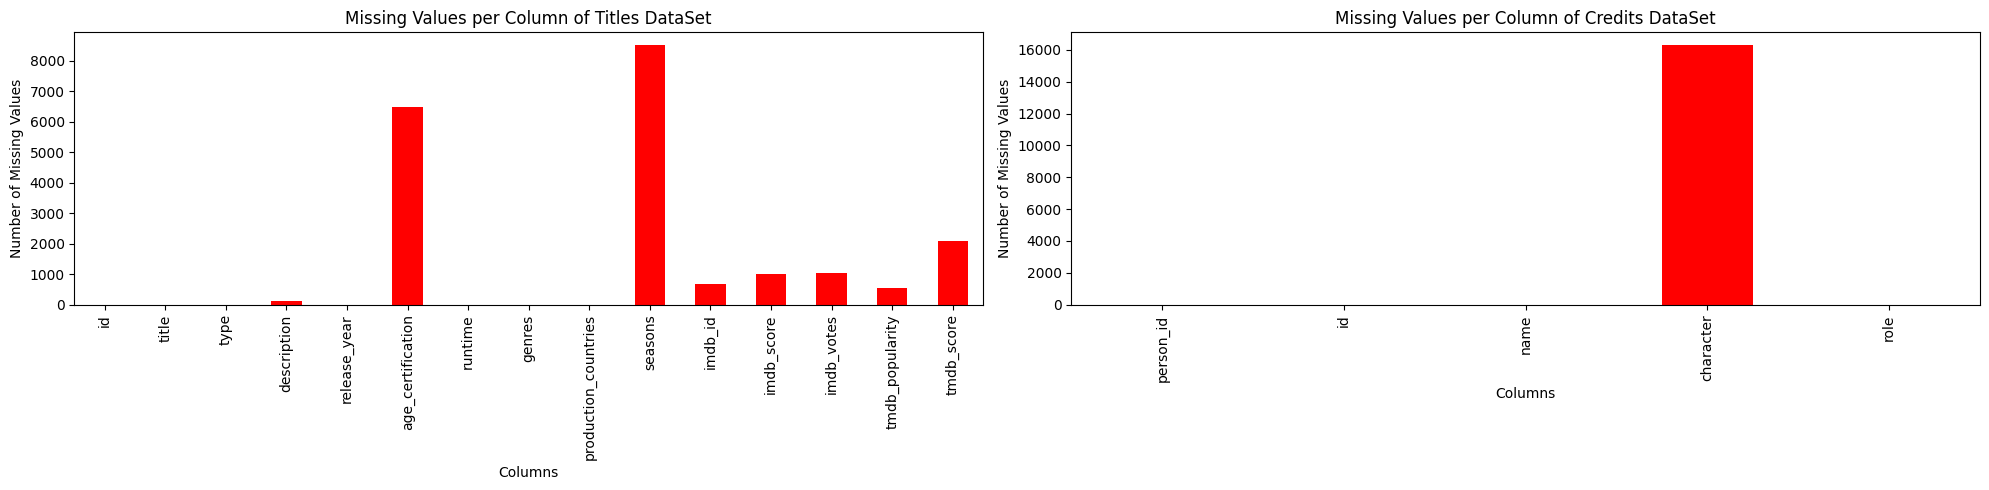

In [9]:
# Visualizing the missing values 

plt.figure(figsize=(20, 5))

# Bar plot for df1 missing values with red color
plt.subplot(1, 2, 1)
df1.isnull().sum().plot(kind="bar", color='red')
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Missing Values per Column of Titles DataSet")

# Bar plot for df2 missing values with red color
plt.subplot(1, 2, 2)
df2.isnull().sum().plot(kind="bar", color='red')
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Missing Values per Column of Credits DataSet")

plt.tight_layout()
plt.show()

### What did you know about your dataset?

The two datasets focus on the TV industry. The first dataset contains details about various movies and series, while the second provides information on actors and directors.

During the analysis, duplicate rows and missing values were identified. These issues have been handled to improve data quality and accuracy.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns 
print('Titles dataset\n', df1.columns) 
print('\nCredits dataset\n', df2.columns)

Titles dataset
 Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

Credits dataset
 Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')


In [11]:
# Dataset Describe 
display(df1.describe(include='all'), df2.describe(include='all'))

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871,9871,9871,9752,9871.000000,3384,9871.000000,9871,9871,1357.000000,9204,8850.000000,8.840000e+03,9324.000000,7789.000000
unique,9868,9737,2,9734,NaN,11,NaN,2028,497,NaN,9201,NaN,NaN,NaN,NaN
top,tm66674,King Lear,MOVIE,No overview found.,NaN,R,NaN,['drama'],['US'],NaN,tt0033683,NaN,NaN,NaN,NaN
freq,2,3,8514,5,NaN,1249,NaN,908,4810,NaN,2,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2001.327221,NaN,85.973052,NaN,NaN,2.791452,NaN,5.976395,8.533614e+03,6.910204,5.984247
std,NaN,NaN,NaN,NaN,25.810071,NaN,33.512466,NaN,NaN,4.148958,NaN,1.343842,4.592015e+04,30.004098,1.517986
min,NaN,NaN,NaN,NaN,1912.000000,NaN,1.000000,NaN,NaN,1.000000,NaN,1.100000,5.000000e+00,0.000011,0.800000
25%,NaN,NaN,NaN,NaN,1995.500000,NaN,65.000000,NaN,NaN,1.000000,NaN,5.100000,1.170000e+02,1.232000,5.100000
50%,NaN,NaN,NaN,NaN,2014.000000,NaN,89.000000,NaN,NaN,1.000000,NaN,6.100000,4.625000e+02,2.536000,6.000000
75%,NaN,NaN,NaN,NaN,2018.000000,NaN,102.000000,NaN,NaN,3.000000,NaN,6.900000,2.236250e+03,5.634000,6.900000


,person_id,id,name,character,role
count,1.242350e+05,124235,124235,107948,124235
unique,NaN,8861,79758,71097,2
top,NaN,tm458582,George 'Gabby' Hayes,Himself,ACTOR
freq,NaN,137,49,1540,115846
mean,4.064737e+05,NaN,NaN,NaN,NaN
std,5.616296e+05,NaN,NaN,NaN,NaN
min,1.000000e+00,NaN,NaN,NaN,NaN
25%,3.899200e+04,NaN,NaN,NaN,NaN
50%,1.339490e+05,NaN,NaN,NaN,NaN
75%,5.712560e+05,NaN,NaN,NaN,NaN


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable. 
display(df1.nunique(), 
         df2.nunique())

id                      9868
title                   9737
type                       2
description             9734
release_year             110
age_certification         11
runtime                  207
genres                  2028
production_countries     497
seasons                   32
imdb_id                 9201
imdb_score                86
imdb_votes              3650
tmdb_popularity         5325
tmdb_score                89
dtype: int64

person_id    80508
id            8861
name         79758
character    71097
role             2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
df1["production_countries"]
def Clean(Unclean_list):
    if pd.isna(Unclean_list):
        return None
    if Unclean_list == "[]":
            return np.nan
    return Unclean_list
df1['production_countries'] = df1['production_countries'].apply(Clean)
df1['genres'] = df1['genres'].apply(Clean)
df1['tmdb_popularity'] = df1['tmdb_popularity'].apply(lambda x: round(x, 1))

In [30]:
df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)

In [31]:
actors_df = df2[df2['role'] == 'ACTOR'].copy()
directors_df = df2[df2['role'] == 'DIRECTOR'].copy()

In [36]:
df2 = df2.groupby('id').agg({
    'person_id': lambda x: ', '.join(map(str, x)), 'name': lambda x: ', '.join(x), 'character': lambda x: ', '.join(map(str, x)), 'role': lambda x: ', '.join(x)}).reset_index()
df3 = pd.merge(df1, df2, on='id', how='outer')
df3.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,tm100001,The Lucky Texan,MOVIE,"Jerry Mason, a young Texan, and Jake Benson, a...",1934,NaN,61,"['western', 'action', 'romance']",['US'],NaN,tt0025440,5.6,1213.0,4.1,4.7,"25629, 578138, 27356, 100231, 13327, 133934, 1...","John Wayne, Barbara Sheldon, Lloyd Whitlock, G...","Jerry Mason, Betty Benson, Harris, Jake 'Grand...","ACTOR, ACTOR, ACTOR, ACTOR, ACTOR, ACTOR, ACTO..."
1,tm1000022,Boonie Bears: The Wild Life,MOVIE,Bear brothers Briar and Bramble set off on an ...,2021,NaN,99,"['scifi', 'animation']",['CN'],NaN,tt11654032,5.4,117.0,6.1,3.8,"1793831, 1793745, 159207, 2289442, 159208","Chris Boike, Nikki Stinson, Tan Xiao, 张伟, Leon...","nan, nan, nan, 熊大 (配音), nan","ACTOR, ACTOR, ACTOR, ACTOR, DIRECTOR"
2,tm1000169,Bad Cupid,MOVIE,Archie is a God on a mission to ensure that tr...,2021,NaN,81,"['romance', 'comedy']",NaN,NaN,tt11333938,4.4,181.0,3.3,4.8,"2853, 304835, 51478, 1795358, 1795272, 1795835...","John Rhys-Davies, Shane Nepveu, Briana Marin, ...","Archie, Dave, Morris, Henry, Stella, Denise, M...","ACTOR, ACTOR, ACTOR, ACTOR, ACTOR, ACTOR, ACTO..."
3,tm1000186,Carol's Christmas,MOVIE,Scrooge encounters the ghost of her late busin...,2021,NaN,70,"['drama', 'thriller']",NaN,NaN,tt13814142,2.0,48.0,0.6,NaN,NaN,NaN,NaN,NaN
4,tm1000203,Digging to Death,MOVIE,David Van Owen moves into a mysterious house a...,2021,NaN,96,"['horror', 'thriller']",['US'],NaN,tt7752100,4.5,464.0,3.5,5.8,"67535, 14513, 177968, 3072, 25459, 242690, 132...","Ford Austin, Tom Fitzpatrick, Rachel Alig, Ric...","David Vanowen, The Corpse, Jessica Vanowen, Al...","ACTOR, ACTOR, ACTOR, ACTOR, ACTOR, ACTOR, ACTO..."


In [33]:
movies_df = df3[df3['type'] == 'MOVIE'].copy()
shows_df = df3[df3['type'] == 'SHOW'].copy()

### What all manipulations have you done and insights you found?

The dataset was cleaned by handling missing values in the production_countries and genres columns, replacing empty lists with NaN for better accuracy. The tmdb_popularity values were rounded for consistency, and duplicate rows were removed to prevent data inflation.

Actors and directors were separated into distinct datasets, and multiple credits per title were combined into single records. The titles and credits were merged, creating a refined dataset (df3) with aggregated actor details. Finally, the data was split into separate movie (movies_df) and show (shows_df) datasets for more focused analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  Distribution of Shows vs. Movies

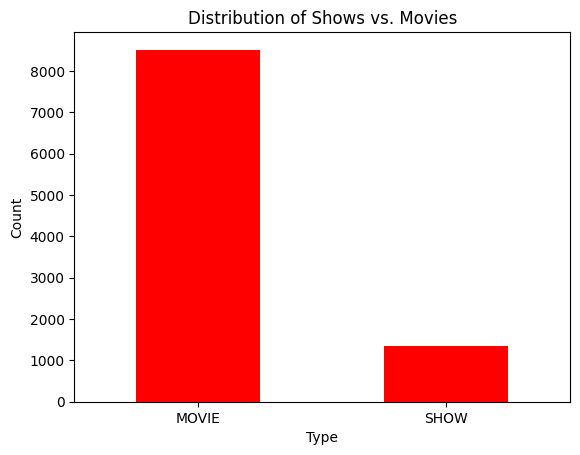

In [34]:
df1['type'].value_counts().plot(kind='bar', color='red')
plt.xlabel("Type")
plt.ylabel("Count")
plt.title("Distribution of Shows vs. Movies")
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a **bar chart** because it clearly compares the number of movies and shows, making it easy to see the difference at a glance. The red color highlights the contrast effectively.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that **movies are far more common than shows** in the dataset, suggesting either higher production rates or better data availability for movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can **positively impact business** by helping platforms focus more on **movie-related content and marketing strategies** to attract viewers.  

However, the **lower number of shows** could be a **negative signal** if the platform relies on TV series for engagement. It may indicate **limited content availability**, potentially reducing viewer retention for users who prefer shows.

#### Chart - 2  Top 10 Most Popular Movies

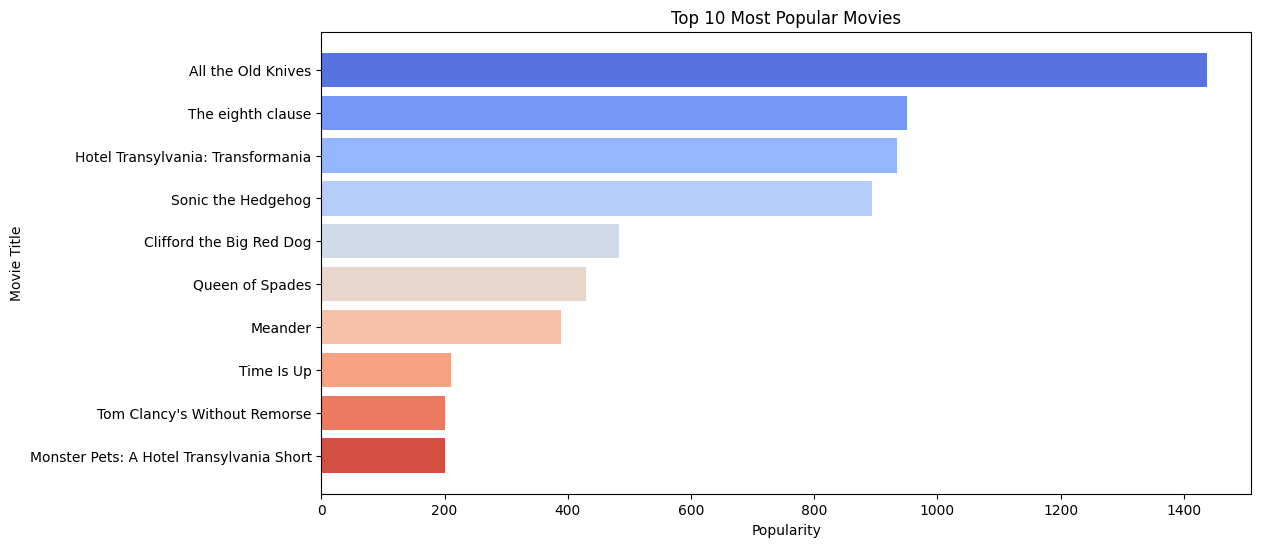

In [37]:
top_movies = movies_df.nlargest(10, 'tmdb_popularity')[['title', 'tmdb_popularity']]

plt.figure(figsize=(12, 6))
colors = sns.color_palette("coolwarm", len(top_movies))  # Gradient color scheme
plt.barh(top_movies['title'], top_movies['tmdb_popularity'], color=colors)

plt.xlabel("Popularity")
plt.ylabel("Movie Title")
plt.title("Top 10 Most Popular Movies")

plt.gca().invert_yaxis()  # Ensures the most popular movie appears at the top
plt.show()


##### 1. Why did you pick the specific chart?

I chose a horizontal bar chart because it makes movie titles easier to read, especially when they are long. The gradient color scheme adds a visual appeal, making it engaging while clearly showing the popularity differences.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that "All the Old Knives" is the most popular movie, standing out significantly from the rest. There’s also a noticeable gap between the top few movies and the others, indicating that only a handful dominate in popularity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help in making strategic decisions, such as promoting high-performing movies more or investing in similar content to attract viewers.  

However, the gap in popularity suggests that many movies struggle to gain traction. If not addressed, this could lead to **missed revenue opportunities** and inefficient content investment.

#### Chart - 3 Top 10 Most Popular Shows

C:\Users\user\AppData\Local\Temp\ipykernel_26092\534712123.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='tmdb_popularity', y='title', data=top_shows, palette="viridis", dodge=False)


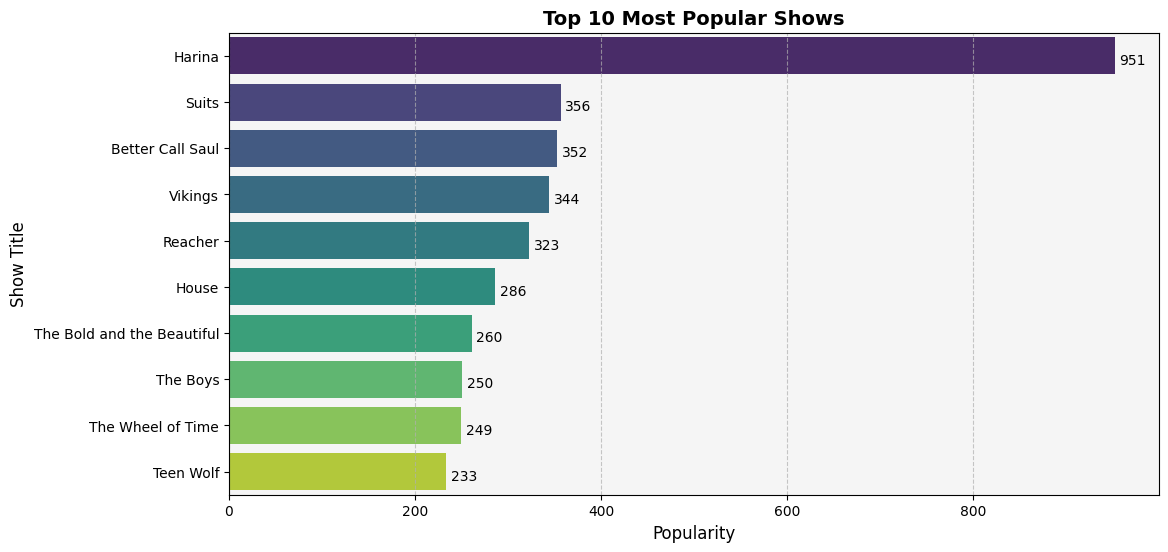

In [38]:

top_shows = shows_df.nlargest(10, 'tmdb_popularity')[['title', 'tmdb_popularity']]

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='tmdb_popularity', y='title', data=top_shows, palette="viridis", dodge=False)

# Add value labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width() + 5, p.get_y() + 0.5), ha='left', va='center', fontsize=10)

plt.xlabel("Popularity", fontsize=12)
plt.ylabel("Show Title", fontsize=12)
plt.title("Top 10 Most Popular Shows", fontsize=14, fontweight='bold')

# Improve aesthetics
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().set_facecolor("#f5f5f5")  # Light background
plt.show()

##### 1. Why did you pick the specific chart?

I chose this chart because a horizontal bar chart makes long show titles easy to read, while the color gradient adds a visually appealing touch. The value labels give clear insights at a glance, and the subtle grid lines improve readability without clutter. It's all about making data both engaging and easy to understand! 

##### 2. What is/are the insight(s) found from the chart?

The chart shows that "Harina" is significantly more popular than the other shows, with a big gap in popularity. Shows like "Suits" and "Better Call Saul" also have strong fan followings. This suggests that crime and legal dramas continue to attract a large audience, while other genres have a more balanced viewership. 

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes! The insights can help businesses invest in trending genres like crime and legal dramas, boosting engagement and revenue. However, the popularity gap suggests that lesser-known shows may struggle, leading to unequal growth. Platforms might need to promote underrated shows to keep a diverse audience interested.

#### Chart - 4 Top 10 Most Common Genres in Movies & Shows

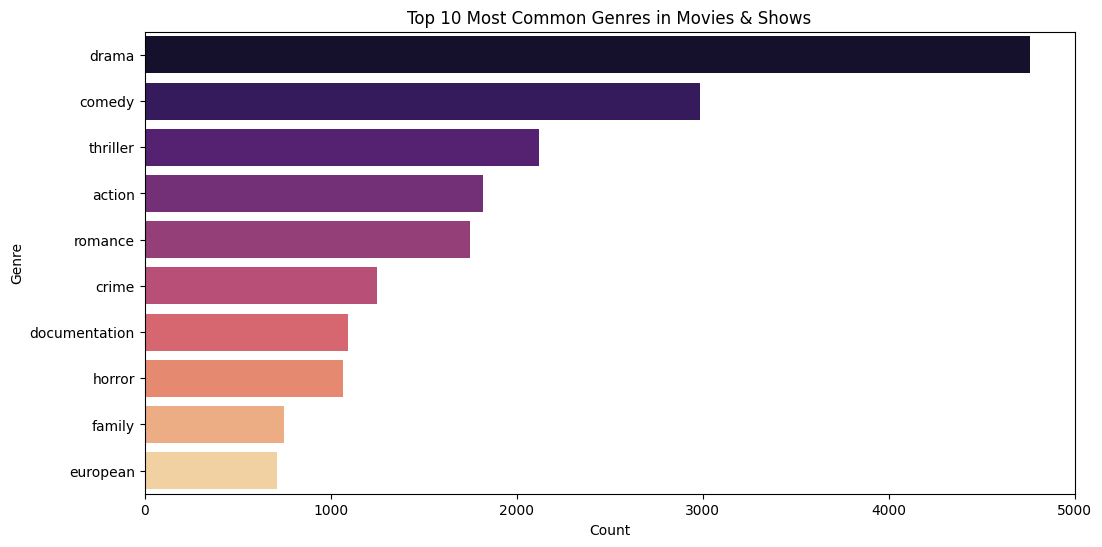

In [39]:
from collections import Counter
import ast
# Extract genres from df3
all_genres = df3['genres'].dropna().apply(ast.literal_eval).sum()
genre_counts = Counter(all_genres).most_common(10)
# Plot the top genres
plt.figure(figsize=(12, 6))
sns.barplot(x=[x[1] for x in genre_counts], y=[x[0] for x in genre_counts], hue=[x[0] for x in genre_counts], palette="magma",legend=False)
plt.xlabel("Count")
plt.ylabel("Genre")
plt.title("Top 10 Most Common Genres in Movies & Shows")
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart makes it easier to compare genres, especially when the labels are long. It also highlights the most popular genres at a glance, helping businesses focus on what audiences love the most! 

##### 2. What is/are the insight(s) found from the chart?

The chart shows that drama and comedy are the most common genres, meaning they dominate the entertainment industry. This suggests that audiences have a strong preference for emotional storytelling and humor.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can positively impact business by helping streaming platforms and producers focus on popular genres like drama and comedy to attract more viewers.

However, overcrowding in these genres could lead to negative growth, as less diversity might make it harder for new content to stand out. Exploring niche genres could help capture untapped audiences.

#### Chart - 5 5 Top 10 Production Countries

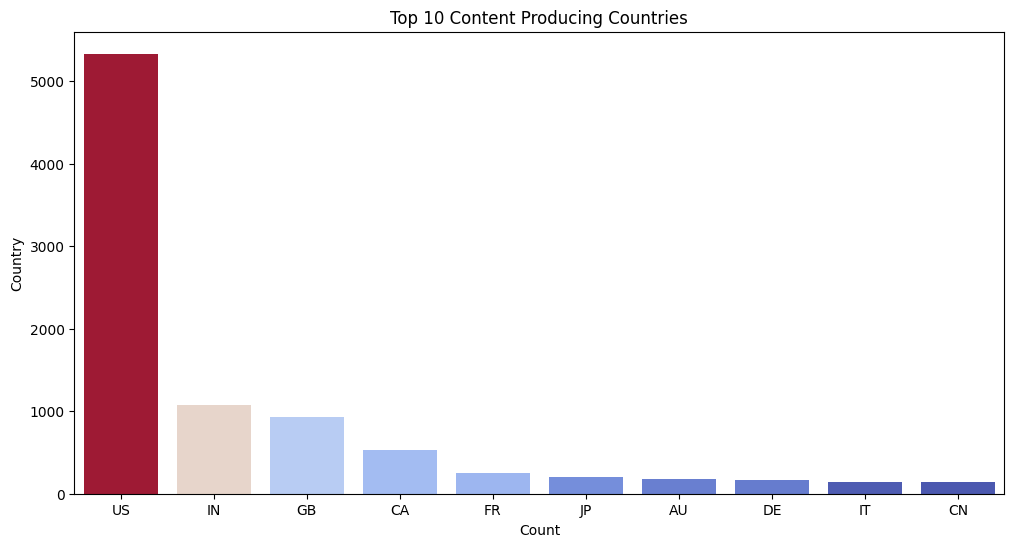

In [40]:
from collections import Counter
import ast
all_countries = df1['production_countries'].dropna().apply(ast.literal_eval).sum()
country_counts = Counter(all_countries).most_common(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=[x[0] for x in country_counts], y=[x[1] for x in country_counts], hue=[x[1] for x in genre_counts], palette="coolwarm",legend=False)
plt.xlabel("Count")
plt.ylabel("Country")
plt.title("Top 10 Content Producing Countries")
plt.show()

##### 1. Why did you pick the specific chart?

I picked this bar chart because it clearly highlights the top content-producing countries, making it easy to compare their contributions. The bars visually show the dominance of the US while still representing other countries' outputs. It’s a simple yet powerful way to communicate trends at a glance!

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the US is the biggest producer of content by a huge margin, followed by India and the UK. This suggests that most movies and shows come from a few dominant regions, which could influence global entertainment trends and audience preferences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help businesses target key content-producing countries for partnerships and distribution, leading to better market reach. However, the heavy dominance of the US may indicate a lack of diversity in content, which could lead to negative growth by limiting audience engagement in underrepresented regions. Expanding content from other countries could attract a wider global audience. 

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [48]:
# Categorical columns: Fill with mode or "Unknown"
df1["description"] = df1["description"].fillna("Unknown description")
df1["age_certification"] = df1["age_certification"].fillna(df1["age_certification"].mode()[0])
df1["genres"] = df1["genres"].fillna("Unknown genres").astype(str).str.split(', ')
df1["production_countries"] = df1["production_countries"].astype(str)
df1["production_countries"] = df1["production_countries"].replace("nan", df1["production_countries"].mode()[0])
df1["production_countries"] = df1["production_countries"].str.split(',')
df1["seasons"] = df1["seasons"].fillna("Not a Show")
df1["imdb_id"] = df1["imdb_id"].fillna("Unknown imdb_id")
df1["imdb_score"] = df1["imdb_score"].fillna(df1["imdb_score"].median())
df1["imdb_votes"] = df1["imdb_votes"].fillna(df1["imdb_votes"].median())
df1["tmdb_popularity"] = df1["tmdb_popularity"].fillna(df1["tmdb_popularity"].median())
df1["tmdb_score"] = df1["tmdb_score"].fillna(df1["tmdb_score"].median())


### 2. Handling Outliers

In [49]:
def cap_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.clip(lower=lower_bound, upper=upper_bound)
# Apply to Numerical columns
numerical_cols = ["imdb_score", "imdb_votes", "tmdb_popularity", "tmdb_score"]
df1[numerical_cols] = df1[numerical_cols].apply(cap_outliers)

### 3. Categorical Encoding

In [50]:
# One-Hot Encode 'genres'
df1_exploded = df1.explode("genres")
df1_exploded = pd.get_dummies(df1_exploded, columns=["genres"])
df1 = df1_exploded.groupby("id", as_index=False).max()

#### 1. Expand Contraction

In [51]:
pip install contractions

In [52]:
import contractions
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = contractions.fix(text)
    return text
df1["description"] = df1["description"].apply(preprocess_text)
df2["character"] = df2["character"].apply(preprocess_text)

#### 2. Lower Casing

In [54]:
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    return text
df1["description"] = df1["description"].apply(preprocess_text)
df2["character"] = df2["character"].apply(preprocess_text)

#### 3. Removing Punctuations

In [55]:
import string
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text
df1["description"] = df1["description"].apply(preprocess_text)
df2["character"] = df2["character"].apply(preprocess_text)

#### 4. Removing URLs & Removing words and digits contain digits.

In [56]:
import re
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
    text = re.sub(r"\b\w*\d\w*\b", "", text)  # Remove words with numbers
    return text
df1["description"] = df1["description"].apply(preprocess_text)
df2["character"] = df2["character"].apply(preprocess_text)

#### 5. Removing Stopwords & Removing White spaces

In [57]:
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download("stopwords")
nltk.download("punkt")

stop_words = set(stopwords.words("english"))

def remove_stopwords_whitespace(text):
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return " ".join(words)
df1["description"] = df1["description"].apply(remove_stopwords_whitespace)
df2["character"] = df2["character"].apply(remove_stopwords_whitespace)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### 6. Rephrase Text

Rephrasing Not Required!

#### 7. Tokenization

In [58]:
def tokenize_text(text):
    return word_tokenize(text)

df1["description_tokens"] = df1["description"].apply(tokenize_text)
df2["character_tokens"] = df2["character"].apply(tokenize_text)

#### 8. Text Normalization

In [59]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = nltk.WordNetLemmatizer()
df1["description"] = df1["description"].apply(lambda text: " ".join([lemmatizer.lemmatize(word) for word in text.split()]))
df2["character"] = df2["character"].apply(lambda text: " ".join([lemmatizer.lemmatize(word) for word in text.split()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


##### Which text normalization technique have you used and why?

I chose lemmatization to improve accuracy in text processing. Unlike stemming, which simply trims word endings (e.g., "caring" becomes "car"), lemmatization considers the context and reduces words to their meaningful base forms (e.g., "caring" becomes "care"). This approach ensures that different forms of a word are treated uniformly, enhancing the quality of analysis

#### 9. Part of speech tagging

In [60]:
import spacy

nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])  # Speed optimization

def pos_tagging(text):
    doc = nlp(text)  # Process text with spaCy
    return [(token.text, token.pos_) for token in doc]  # Return word and its POS tag

df2["character_pos"] = df2["character"].astype(str).apply(pos_tagging)
df1["description_pos"] = df1["description"].astype(str).apply(pos_tagging)


#### 10. Text Vectorization

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=500)  # Use top 500 words
df1_tfidf = vectorizer.fit_transform(df1["description"])
df2_tfidf = vectorizer.transform(df2["character"])


##### Which text vectorization technique have you used and why?

Used TfidfVectorizer.TF-IDF is computationally efficient and easy to implement.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [62]:
df1["description_length"] = df1["description"].astype(str).apply(len)
df1["description_word_count"] = df1["description"].astype(str).apply(lambda x: len(x.split()))
df2["character_length"] = df2["character"].astype(str).apply(len)

#### 2. Feature Selection

In [63]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
numerical_features = ["imdb_score", "imdb_votes", "tmdb_popularity", "tmdb_score", "description_length"]
X = df1[numerical_features]
y = df1["imdb_score"]
y = y.fillna(y.mean())
X = df1[numerical_features].fillna(X.mean())
selector = SelectKBest(score_func=f_classif, k=3)
X_selected = selector.fit_transform(X, y)
selected_features = np.array(numerical_features)[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: ['imdb_votes' 'tmdb_popularity' 'tmdb_score']


### 5. Data Transformation

In [64]:
for df in [df1, df2]:
    if "imdb_votes" in df.columns:
        df["imdb_votes_log"] = np.log1p(df["imdb_votes"])
    if "tmdb_popularity" in df.columns:
        df["tmdb_popularity_log"] = np.log1p(df["tmdb_popularity"])

### 6. Data Scaling

In [65]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
df1[selected_features] = scaler.fit_transform(df1[selected_features])

### 7. Dimesionality Reduction - Not Required.

### 8. Data Splitting

In [66]:
from sklearn.model_selection import train_test_split
X_train_df1, X_test_df1, y_train_df1, y_test_df1 = train_test_split(df1[selected_features], y, test_size=0.2, random_state=42)
X_train_df2, X_test_df2, y_train_df2, y_test_df2 = train_test_split(df2[["character_length"]], df2["role"], test_size=0.2, random_state=42)

### 9. Handling Imbalanced Dataset

In [67]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE only if the role distribution is imbalanced
if df2["role"].value_counts(normalize=True).max() > 0.75:
    smote = SMOTE(random_state=42)
    X_train_df2, y_train_df2 = smote.fit_resample(X_train_df2, y_train_df2)

## ***7. ML Model Implementation***

In [68]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_df2, y_train_df2)
y_pred_df2 = classifier.predict(X_test_df2)
accuracy_df2 = accuracy_score(y_test_df2, y_pred_df2)
print("Random Forest Accuracy:", accuracy_df2)

Random Forest Accuracy: 0.16187253243090807


#### 1. Cross- Validation & Hyperparameter Tuning

In [69]:
param_grid = {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring="accuracy")
grid_search.fit(X_train_df2, y_train_df2)
best_model = grid_search.best_estimator_
print("Best Random Forest Model:", best_model)

c:\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best Random Forest Model: RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)


## **8. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***